In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data_set = pd.read_csv('Reviews.csv')

# Extract the first 10000 rows
data_set = data_set[:10000]

In [11]:
# 第一題
df = data_set.groupby(['UserId','ProfileName'])
agg = df['Score'].agg([('Score count','count'), ('Score mean', 'mean')])


agg_sorted = agg.sort_values(by = 'Score count', ascending = False)
print(agg_sorted.head(10))

                                                           Score count  \
UserId         ProfileName                                               
A1Z54EM24Y40LL c2                                                   17   
A2SZLNSI5KOQJT Carrie, "Formerly &#34;Sister Carrie&#34;"           10   
A35R32TA60XD57 M. Torma                                              9   
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"                8   
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                      7   
A3NHUQ33CFH3VM Citizen John                                          7   
A3PJZ8TU8FDQ1K Jared Castle                                          7   
AQ6SHOW0VMZGF  K. Padgett "familyof5"                                6   
A26NFIQ7KWI8Y7 kt rose                                               6   
A10H24TDLK2VDP William Jens Jensen                                   6   

                                                           Score mean  
UserId         ProfileName             

In [12]:
# 第二題
df = data_set.groupby(['UserId'], as_index=True)
agg = df['UserId'].agg([('Review Number','count')])
y =  agg['Review Number']

# find the user who post the most reviews
agg_sorted = agg.sort_values(by = 'Review Number', ascending = False)
print(agg_sorted.head(5))

agg_sorted.head(1).index[0]
result = df.get_group(agg_sorted.head(1).index[0])['Score']

                Review Number
UserId                       
A1Z54EM24Y40LL             17
A2SZLNSI5KOQJT             10
A35R32TA60XD57              9
A281NPSIMI1C2R              8
A3OXHLG6DIBRW8              7


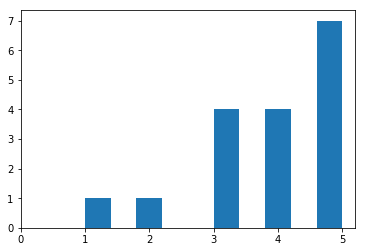

In [14]:
# plot the second problem
plt.hist(result)
x_ticks = np.arange(0, 6, 1)
plt.xticks(x_ticks)
plt.show()


In [15]:
# 第三題
import datetime 

def transferTime(x):
    return datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m')

data_set['new_Date'] = data_set['Time'].apply(transferTime)
df = data_set.groupby(['new_Date'], as_index=True)
agg = df['Id'].agg([('Review Number','count')])

re = agg['Review Number']

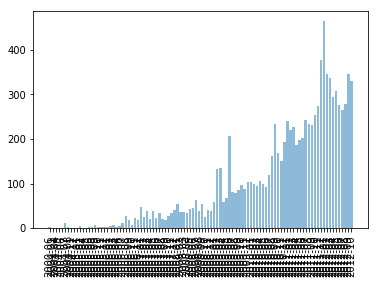

In [16]:

fig = plt.figure()
ax = fig.add_subplot(111)

x= []
y= []
for j, group in enumerate(re):
    x.append(re.index[j]) 
    y.append(group) 
    
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, x)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [50, 15]
plt.show()


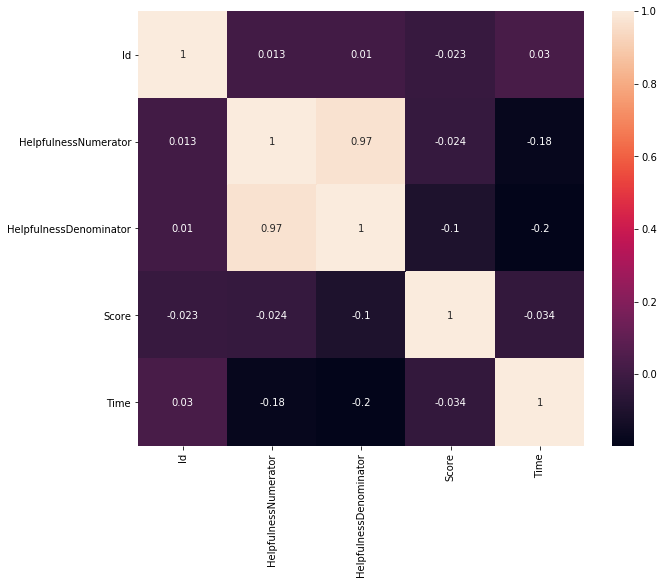

In [17]:
# 第四題
import seaborn as sns

df = data_set.loc[:, ['Id','HelpfulnessNumerator','HelpfulnessDenominator', 'Score','Time']]

plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)

In [18]:
# 第五題
data_set['helpful_percent'] = 0
for index, row in data_set.iterrows():
    if (row['HelpfulnessDenominator'] == 0):
        data_set.loc[index, 'helpful_percent'] = -1
    else:
        data_set.loc[index, 'helpful_percent']  =  (row['HelpfulnessNumerator'] / row['HelpfulnessDenominator'])


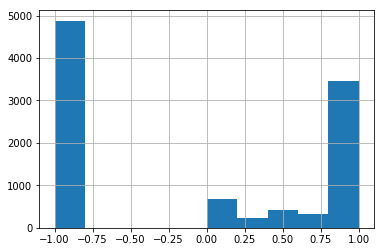

In [5]:
#plotting
plt.hist(data_set['helpful_percent'])
plt.grid()
plt.show()

# Part II

#### data is from https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#appleStore_description.csv

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data_set = pd.read_csv('AppleStore.csv')
data_set.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [21]:
# group by genre
by_genre = data_set.groupby(['prime_genre'])

In [22]:
# group by price
by_price = data_set[data_set['price']<50].groupby(['price'])

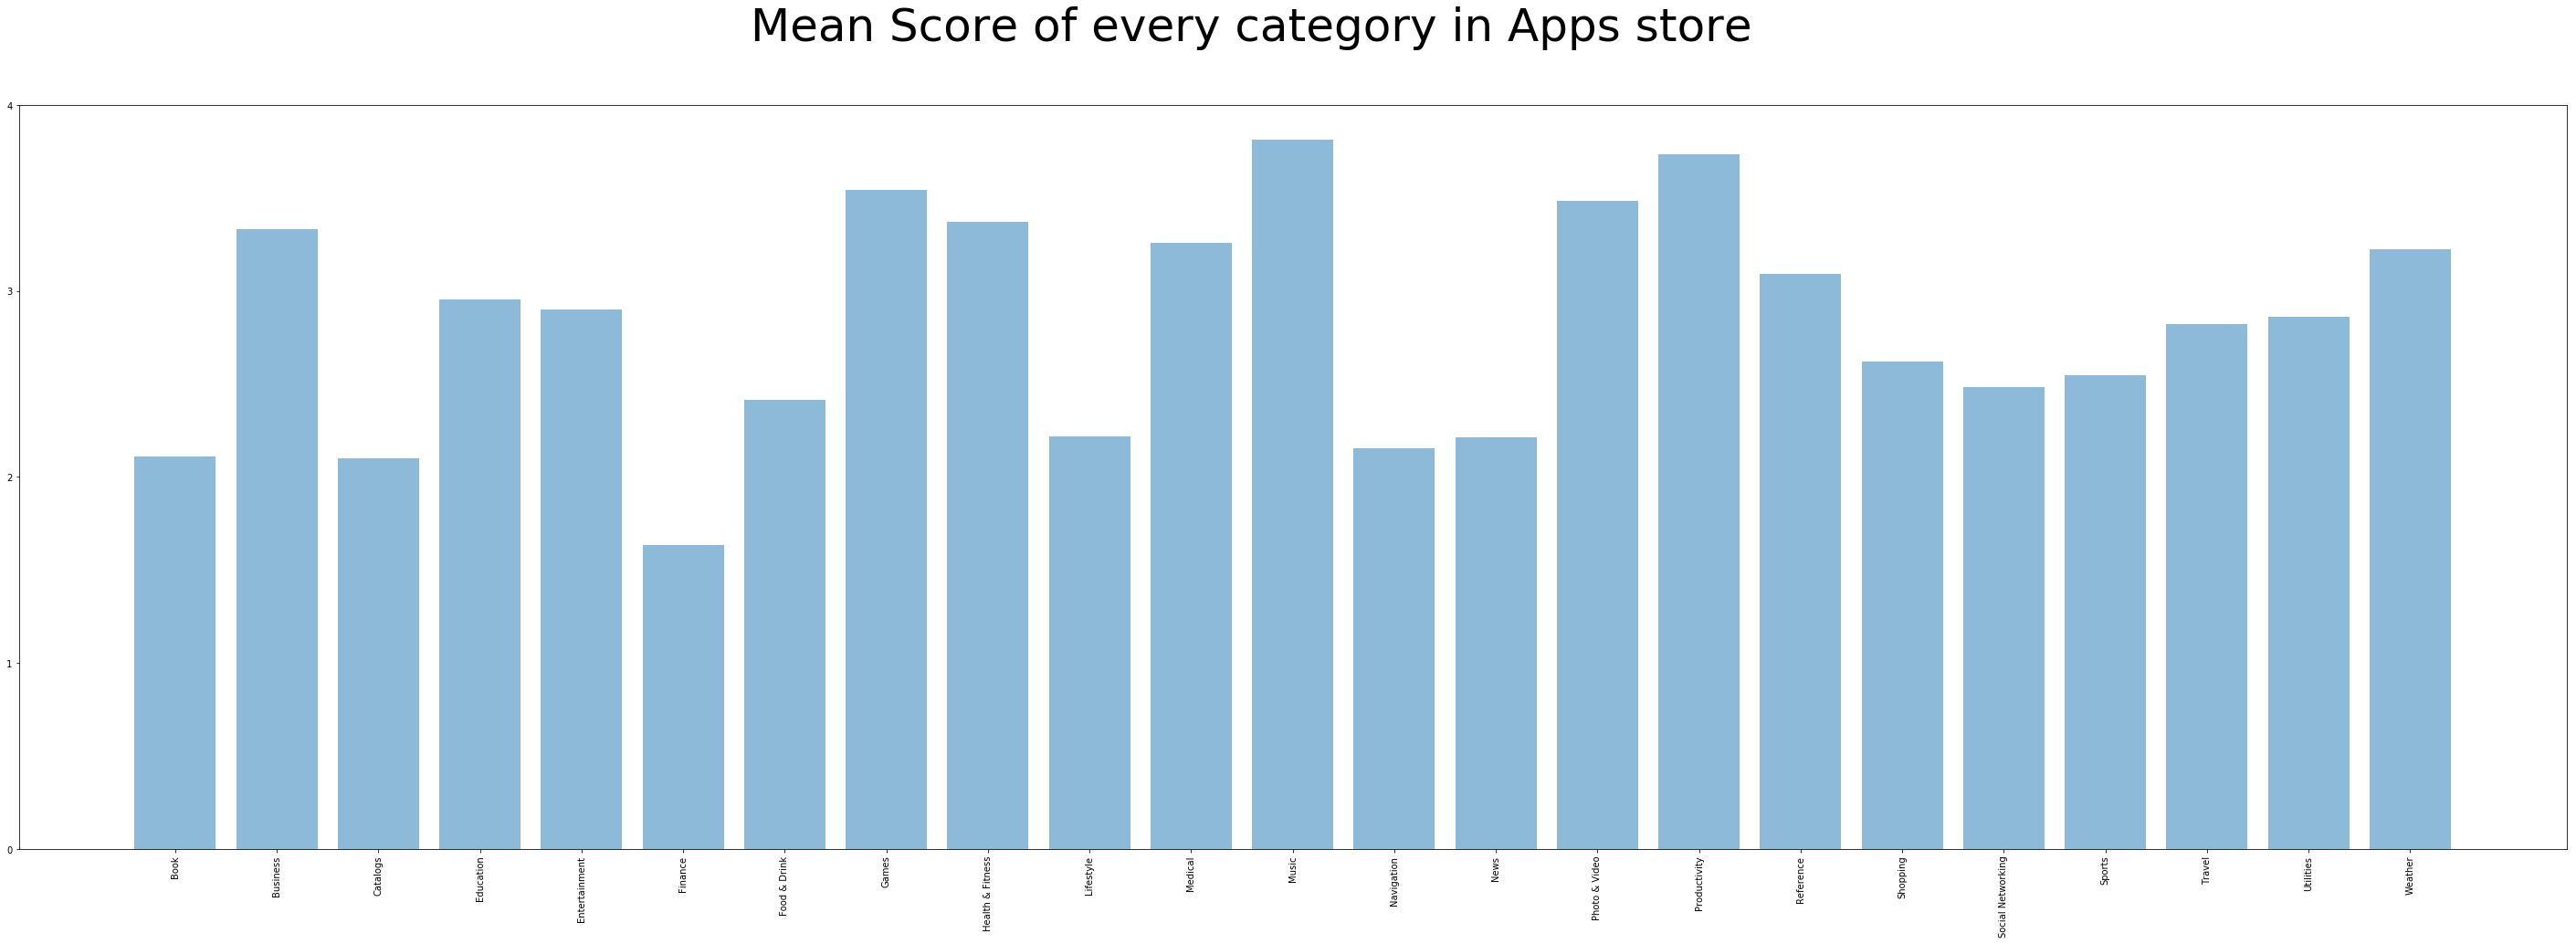

In [23]:
# mean of users' rating in every genre
user_rate_mean = by_genre.describe()['user_rating_ver']['mean']

fig = plt.figure()
ax = fig.add_subplot(111)

y = user_rate_mean.values
x = user_rate_mean.index
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, x)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [50, 15]
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=50) 
plt.suptitle('Mean Score of every category in Apps store',  fontsize=50)
plt.show()

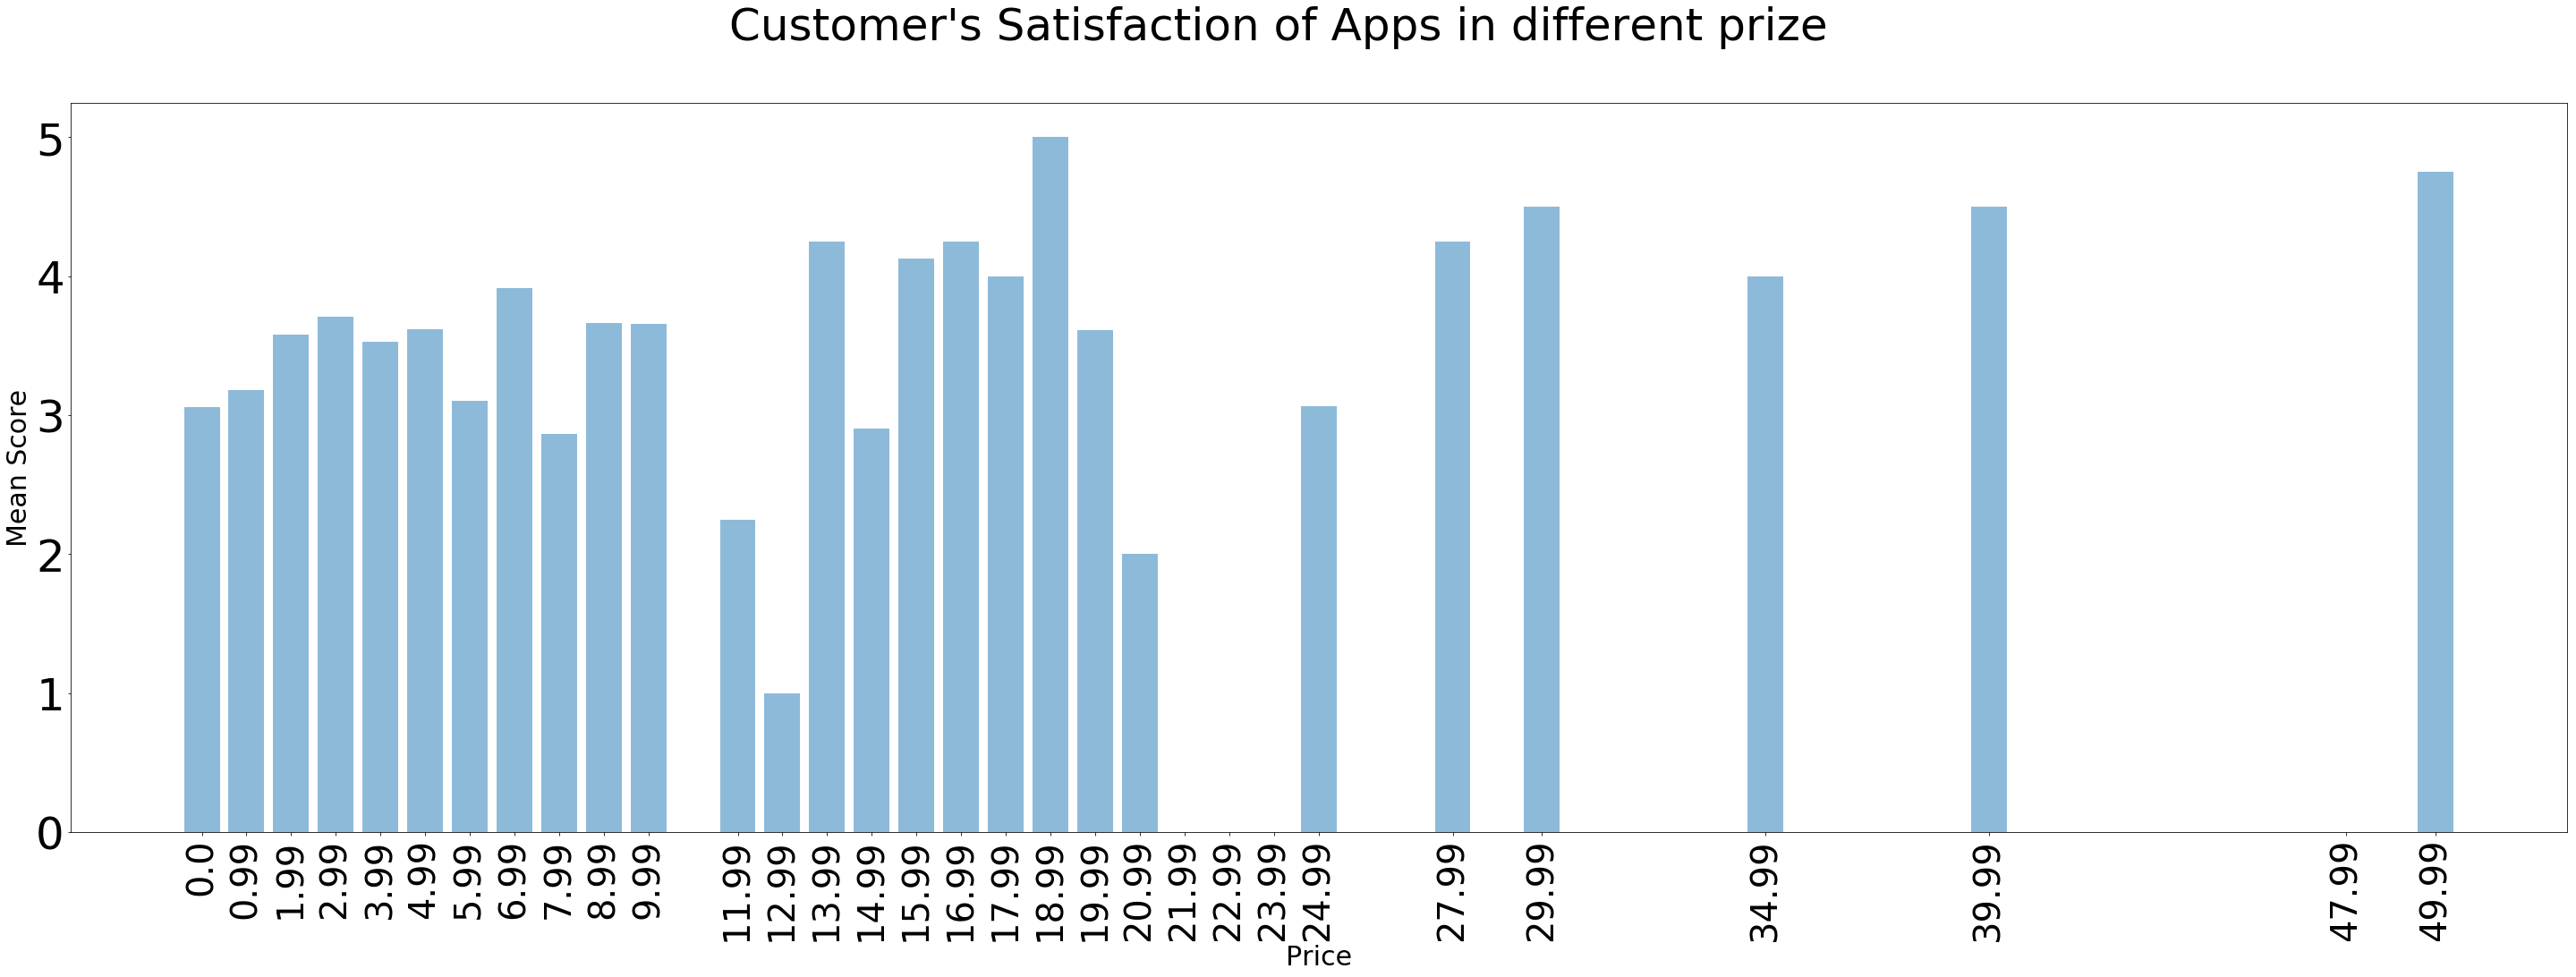

In [24]:
# user's mean rating in different price
user_rate_price = by_price.describe()['user_rating_ver']

fig = plt.figure()
ax = fig.add_subplot(111)

y = np.array(by_price.describe()['user_rating_ver']['mean'])
x = by_price.describe()['user_rating_ver'].index
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, x)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [50, 15]
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=50) 
plt.xlabel('Price', fontsize = 30)
plt.ylabel('Mean Score', fontsize = 30)
plt.suptitle("Customer's Satisfaction of Apps in different prize",  fontsize=50)
plt.show()

In [25]:
by_price.describe()['user_rating_ver'].index

Float64Index([  0.0,  0.99,  1.99,  2.99,  3.99,  4.99,  5.99,  6.99,  7.99,
               8.99,  9.99, 11.99, 12.99, 13.99, 14.99, 15.99, 16.99, 17.99,
              18.99, 19.99, 20.99, 21.99, 22.99, 23.99, 24.99, 27.99, 29.99,
              34.99, 39.99, 47.99, 49.99],
             dtype='float64', name='price')

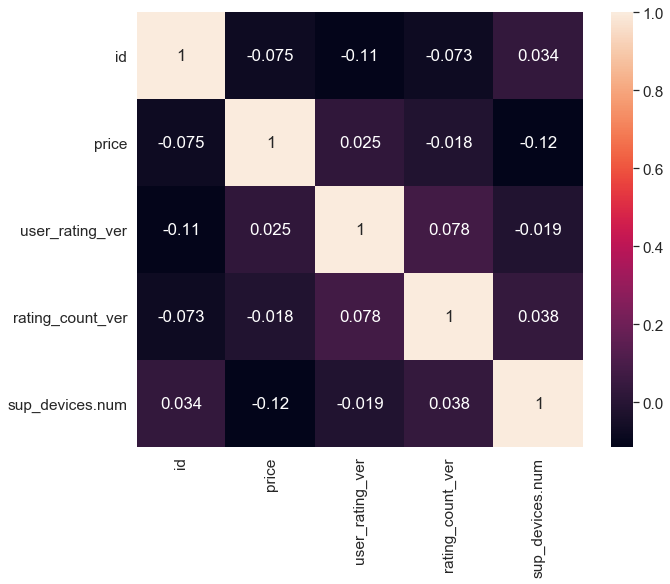

In [31]:
import seaborn as sns

df = data_set.loc[:, ['id', 'price','user_rating_ver','rating_count_ver', 'sup_devices.num']]
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True)

## The below model can predict satisfaction of students on coursera based on students' reviews.

#### data is from https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#appleStore_description.csv

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [217]:
dataset = pd.read_csv('Coursera\'s_reviews.csv')
dataset = dataset.iloc[: 1500]

def convert(x):
    if(x > 3):
        return 1
    else:
        return 0
dataset['Label'] = dataset['Label'].apply(convert)

In [218]:
# Cleaning the text (delete unmeaningful wards, such as 'on''...''Loved --> love',and capital)
import re
import nltk

In [219]:
nltk.download('stopwords')  #stopword list, ex: 'this'
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []  # corpus is a collection of words
for i in range(0, len(dataset['Review'])):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])  #remove char. not a to z replace to a space
    review = review.lower() #lower the case
    review = review.split() # split the string into different word into a list
    ps = PorterStemmer() #stemming ex: loved --> love and remove unrelated words ex:the this that...
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #python iterate faster with set than list
    review = ' '.join(review) # imerge the list back into a string
    corpus.append(review)

[nltk_data] Downloading package stopwords to /Users/mark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [222]:
# Create the Bag of Words model
# This section will seprerate each word into a new column, so we can solve this problem with classification
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 2700)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 2].values #dependent variable use X and y to train the model
len(X[0])

2700

In [223]:
# Use naive_bayes
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [224]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [225]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [226]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [227]:
Accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]) #Accuracy result

In [228]:
cm

array([[ 11,  10],
       [104, 175]])

#### In the above table, 11 and 175 are the right predictions

In [229]:
Accuracy

0.62

### 1000 data: Accuracy = 0.565
### 1500 data: Accuracy = 0.62
### 2000 data: Accuracy = 0.56
### 2500 data: Accuracy = 0.516
#### note: It is interesting that if the model is trained by more data, the accuracy will decline.